# Core

> Core functions in Katlas library

## Setup

In [ ]:
#| default_exp core

In [ ]:
#| export
import pandas as pd
import numpy as np
import seaborn as sns
from fastcore.basics import partial
from tqdm import tqdm

# from fastbook import *

In [ ]:
#| hide
from nbdev.showdoc import *

## Kinase Data

The main dataset is from [Lew's Nature paper Supplementary Table2](https://www.nature.com/articles/s41586-022-05575-3#Sec23)

In [ ]:
#| export
class Data:
    """
    A class for fetching various datasets.
    """
    
    # Kinase info
    KINASE_INFO_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/STkinase_info.parquet"
    KINASE_ALL_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/full_kinase_info.parquet"
    
    # ESM
    KINASE_ESM_RAW_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/kinase_esm.parquet"
    KINASE_ESM_PCA_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/kinase_esm_pca32.parquet"
    KINASE_ESM_FULL_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/kinase_esm_full.parquet"
    
    # T5
    KINASE_T5_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/T5_xl_uniref50.parquet"
    KINASE_T5_FULL_BFD_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/T5_xl_bfd.parquet"
    KINASE_T5_FULL_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/T5_xl_uniref50_full.parquet"
    
    # Amino acid info
    AA_INFO_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/aa_info.parquet"
    AA_FEATURE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/aa_rdkit.parquet"
    AA_MORGAN_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/aa_morgan.parquet"
    
    # Paper raw data
    RAW_KINASE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/paper_raw.parquet"
    NORM_KINASE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/paper_norm.parquet"
    SCALE_KINASE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/paper_scale.parquet"
    
    
    # Unstacked target
    RAW_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_raw.parquet"
    
    MEDIAN_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_median.parquet"
    STANDARD_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_standard.parquet"
    LOG_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_log.parquet"
    
    Q85_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_q85.parquet"
    Q85_UP40_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_q85_up40.parquet"
    
    # Stacked target
    STANDARD_STACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/pivot_standard.parquet"
    LOG_STACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/pivot_log.parquet"
    
    # Prepared dataset
    DF_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/df_esm64_aa16.parquet"
    
    # Kinase substrate datasets
    KS_DATASET_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/ks_datasets.parquet"
    
    KS_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/ks_main.parquet"
    KS_UPPER_URL ="https://github.com/sky1ove/katlas/raw/main/dataset/ks_main_upper.parquet"
    KS_MAIN_INFO_URL="https://github.com/sky1ove/katlas/raw/main/dataset/ks_main_info.parquet"
    
    KS_OTHERS_URL="https://github.com/sky1ove/katlas/raw/main/dataset/ks_others.parquet"
    KS_OTHERS_INFO_URL="https://github.com/sky1ove/katlas/raw/main/dataset/ks_others_info.parquet"

    # scaled PSPA based on KS format
    PSPA_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/pspa_main.parquet"
    PSPA_UPPER_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/pspa_main_upper.parquet"
    # original pspa norm data with 0 position
    PSPA_ORIGINAL = "https://github.com/sky1ove/katlas/raw/main/dataset/pspa_original.parquet"
    
    # Combined PSPA and KS
    COMBINE_URL =  "https://github.com/sky1ove/katlas/raw/main/dataset/combine_main.parquet"
    COMBINE_UPPER_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/combine_main_upper.parquet"
    
    # reference databaase
    # For ref of linkedomicsKB, contains unique EnsemblProteinID+site
    CPTAC_KB_URL = "https://github.com/sky1ove/katlas/raw/main/database/linkedOmicsKB_ref_pan.parquet"
    # From the above, but keep the unique site seq, with gene_site separated by |
    CPTAC_UNIQUE_URL = "https://github.com/sky1ove/katlas/raw/main/database/cptac_unique_site.parquet"
    # for ref of linkedomics, contains unique Gene+site
    CPTAC_URL = "https://github.com/sky1ove/katlas/raw/main/database/linkedOmics_ref_pan.parquet"
    # from pplus, contains Gene+site
    PPLUS_HUMAN_URL = "https://github.com/sky1ove/katlas/raw/main/database/pplus_human.parquet"
    # from ochoa et al. The functional landscape of the human phosphoproteome
    OCHOA_URL = "https://github.com/sky1ove/katlas/raw/main/database/ochoa_site.parquet"
    # combined PPLUS low throughput and ochoa
    COMBINE_PPLUS_OCHOA_URL = "https://github.com/sky1ove/katlas/raw/main/database/combine_site_ochoa_pplus.parquet"
    
    
    def __init__(self):
        pass
    
    @staticmethod
    def _fetch_data(url):
        """
        Fetches the data from the given URL and returns a DataFrame
        """
        df = pd.read_parquet(url)
        if 'Unnamed: 0' in df.columns:
            df = df.rename(columns={'Unnamed: 0': 'kinase'})
        return df
    

    @staticmethod
    def get_stack_raw():
        return Data._fetch_data(Data.RAW_KINASE_URL)
    
    @staticmethod
    def get_stack_norm():
        return Data._fetch_data(Data.NORM_KINASE_URL)
    
    
    @staticmethod
    def get_stack_scale():
        return Data._fetch_data(Data.SCALE_KINASE_URL)

    @staticmethod
    def get_kinase_info():
        return Data._fetch_data(Data.KINASE_INFO_URL)

    @staticmethod
    def get_kinase_info_full():
        return Data._fetch_data(Data.KINASE_ALL_URL)
    
    @staticmethod
    def get_esm():
        return Data._fetch_data(Data.KINASE_ESM_RAW_URL)

    @staticmethod
    def get_esm_full():
        return Data._fetch_data(Data.KINASE_ESM_FULL_URL)

    @staticmethod
    def get_t5():
        return Data._fetch_data(Data.KINASE_T5_URL)

    @staticmethod
    def get_t5_full():
        return Data._fetch_data(Data.KINASE_T5_FULL_URL)
    
    @staticmethod
    def get_t5_bfd_full():
        return Data._fetch_data(Data.KINASE_T5_FULL_BFD_URL)
    

    @staticmethod
    def get_aa_info():
        return Data._fetch_data(Data.AA_INFO_URL)

    @staticmethod
    def get_aa_feature():
        return Data._fetch_data(Data.AA_FEATURE_URL)

    @staticmethod
    def get_unstack_standard():
        return Data._fetch_data(Data.STANDARD_UNSTACK_URL)

    @staticmethod
    def get_unstack_log():
        return Data._fetch_data(Data.LOG_UNSTACK_URL)

    @staticmethod
    def get_unstack_med():
        return Data._fetch_data(Data.MEDIAN_UNSTACK_URL)

    @staticmethod
    def get_unstack_raw():
        return Data._fetch_data(Data.RAW_UNSTACK_URL)

    @staticmethod
    def get_unstack_q85():
        return Data._fetch_data(Data.Q85_UNSTACK_URL)

    @staticmethod
    def get_unstack_q85_up40():
        return Data._fetch_data(Data.Q85_UP40_UNSTACK_URL)

    @staticmethod
    def get_log_stack():
        return Data._fetch_data(Data.LOG_STACK_URL)

    @staticmethod
    def get_standard_stack():
        return Data._fetch_data(Data.STANDARD_STACK_URL)

    @staticmethod
    def get_prepared_data():
        return Data._fetch_data(Data.DF_URL)
    
    @staticmethod
    def get_ks_dataset():
        df = Data._fetch_data(Data.KS_DATASET_URL)
        #Convert the number in the column name into integer
        df.columns = [int(col) if col.lstrip('-').isdigit() else col for col in df.columns]
        return df
        
    @staticmethod
    def get_ks():
        return Data._fetch_data(Data.KS_URL)
    
    @staticmethod
    def get_ks_upper():
        return Data._fetch_data(Data.KS_UPPER_URL)
    
    @staticmethod
    def get_ks_main_info():
        return Data._fetch_data(Data.KS_MAIN_INFO_URL)
    
    @staticmethod
    def get_ks_others():
        return Data._fetch_data(Data.KS_OTHERS_URL)
    
    @staticmethod
    def get_ks_others_info():
        return Data._fetch_data(Data.KS_OTHERS_INFO_URL)
    
    @staticmethod
    def get_pspa_upper():
        return Data._fetch_data(Data.PSPA_UPPER_URL)
    
    @staticmethod
    def get_pspa():
        return Data._fetch_data(Data.PSPA_URL)
    
    @staticmethod
    def get_pspa_original():
        return Data._fetch_data(Data.PSPA_ORIGINAL)
    
    @staticmethod
    def get_combine_upper():
        return Data._fetch_data(Data.COMBINE_UPPER_URL)
    
    @staticmethod
    def get_combine():
        return Data._fetch_data(Data.COMBINE_URL)
    
    
    # unique gene+site, but less cases
    @staticmethod
    def get_cptac_gene_site():
        return Data._fetch_data(Data.CPTAC_URL)
    
    # ensemblID + site, with more sites
    @staticmethod
    def get_cptac_ensembl_site():
        return Data._fetch_data(Data.CPTAC_KB_URL)
    
    @staticmethod
    def get_pplus_human_site():
        return Data._fetch_data(Data.PPLUS_HUMAN_URL)
    
    @staticmethod
    def get_ochoa_site():
        return Data._fetch_data(Data.OCHOA_URL)
    
    @staticmethod
    def get_cptac_unique_site():
        return Data._fetch_data(Data.CPTAC_UNIQUE_URL)
    
    
    @staticmethod
    def get_combine_site_pplus_ochoa():
        return Data._fetch_data(Data.COMBINE_PPLUS_OCHOA_URL)

    

In [ ]:
raw = Data.get_stack_raw().set_index('kinase')

In [ ]:
norm = Data.get_stack_norm().set_index('kinase')

## CPTAC Data

In [ ]:
#| export
class CPTAC:
    """
    A class for fetching CPTAC phosphoproteomics data.
    """
    
    # Phosphoproteomics (Tumor)
    HNSCC = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/HNSCC/HNSCC_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
    GBM = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/GBM/GBM_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
    COAD = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/COAD/COAD_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
    CCRCC = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/CCRCC/CCRCC_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
    LSCC = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/LSCC/LSCC_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
    BRCA = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/BRCA/BRCA_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
    UCEC = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/UCEC/UCEC_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
    LUAD = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/LUAD/LUAD_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
    PDAC = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/PDAC/PDAC_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
    OV = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/OV/OV_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
    
    # Phosphoproteomics (Normal)
    HNSCC_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/HNSCC/HNSCC_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
    GBM_normal = None
    COAD_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/COAD/COAD_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
    CCRCC_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/CCRCC/CCRCC_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
    LSCC_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/LSCC/LSCC_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
    BRCA_normal = None
    UCEC_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/UCEC/UCEC_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
    LUAD_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/LUAD/LUAD_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
    PDAC_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/PDAC/PDAC_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
    OV_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/OV/OV_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
    
    # Ensemble ID gene mapping
    HNSCC_ID = "https://zenodo.org/records/8196130/files/bcm-hnscc-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
    GBM_ID = "https://zenodo.org/records/8196130/files/bcm-gbm-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
    COAD_ID = "https://zenodo.org/records/8196130/files/bcm-coad-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
    CCRCC_ID = "https://zenodo.org/records/8196130/files/bcm-ccrcc-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
    LSCC_ID = "https://zenodo.org/records/8196130/files/bcm-lscc-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
    BRCA_ID = "https://zenodo.org/records/8196130/files/bcm-brca-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
    UCEC_ID = "https://zenodo.org/records/8196130/files/bcm-ucec-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
    LUAD_ID = "https://zenodo.org/records/8196130/files/bcm-luad-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
    PDAC_ID = "https://zenodo.org/records/8196130/files/bcm-pdac-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
    OV_ID = "https://zenodo.org/records/8196130/files/bcm-ov-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
    
    
    def __init__(self):
        pass
    
    @staticmethod
    def _fetch_data(cancer, is_Tumor=True, is_KB=False):
        """
        Fetches the data from the given URL and returns a DataFrame
        """
        
        ID_URL = f"https://zenodo.org/records/8196130/files/bcm-{cancer.lower()}-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
        if is_Tumor:
            DATA_URL = f"https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/{cancer.upper()}/{cancer.upper()}_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
        
        else:
            DATA_URL = f"https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/{cancer.upper()}/{cancer.upper()}_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"

            
        
        # Load ID data
        ref = pd.read_csv(ID_URL, compression='gzip', sep='\t')\
        [['protein','gene','gene_name']]\
        .drop_duplicates().reset_index(drop=True)
        
        
        # Load CPTAC phosphoproteomics data
        try:
            raw = pd.read_csv(DATA_URL, sep='\t')
        except Exception as e:
            print(f'{cancer}{e}')
        else:
            info = pd.DataFrame({'gene':raw.idx.str.split('|').str[0],
                         'site':raw.idx.str.split('|').str[2],
                         'site_seq':raw.idx.str.split('|').str[3]})
            # print(raw.columns[1:]) # patient ID

            print(f'the {cancer} dataset length is: {info.shape[0]}')

            # Merge ensembl ID with gene name
            info = info.merge(ref,'left')
            print(f'after id mapping, the length is {info.shape[0]}')

            print(f'{info.gene_name.isna().sum()} sites does not have a mapped gene name')

            info['gene_site'] = info['gene_name'] + '_' + info['site']
            info['protein_site'] = info['protein'].str.split('.').str[0] + '_' + info['site']

            if is_KB:
                info = info.drop_duplicates(subset='protein_site').reset_index(drop=True)
                print(f'after removing duplicates of protein_site, the length is {info.shape[0]}')
            else:
                info = info.drop_duplicates(subset='gene_site').reset_index(drop=True)
                print(f'after removing duplicates of gene_site, the length is {info.shape[0]}')



            return info
    
    
    @staticmethod
    def list_cancer():
        return ['HNSCC','GBM','COAD','CCRCC','LSCC','BRCA','UCEC','LUAD','PDAC','OV']

    @staticmethod
    def get_id(cancer_type,is_Tumor=True, is_KB=False):
        return CPTAC._fetch_data(cancer_type,is_Tumor, is_KB)


## Data processing

In [ ]:
#| export
def get_unique_site(df, # dataframe that contains phosphorylation sites
                    seq_col='site_seq', # column name of site sequence
                    id_col='gene_site' # column name of site id
                   ):
    
    unique = df.groupby(seq_col).agg(
        {id_col: lambda r: '|'.join(r.unique())} )
    unique['num_site'] = unique[id_col].str.split('|').apply(len) 
    unique = unique.reset_index()
    position = len(unique[seq_col][0])//2
    unique['acceptor'] = unique[seq_col].str[position]
    
    return unique

In [ ]:
#| export 
def convert_string(input_string):
    """
    1. convert lower aa other than s,t,y to capital
    2. convert rare aa to _
    """
    
    allowed_chars = 'PGACSTVILMFYWHKRQNDEsty'
    result = ""
    for char in input_string:
        if char in ['s', 't', 'y']:
            result_char = char
        else:
            result_char = char.upper()
        
        # Replace with underscore if the character is not in the allowed set
        result += result_char if result_char in allowed_chars else '_'
    return result

## Data collection

Remember to validate the center acceptor before extract the site sequence

In [ ]:
#| export
def extract_site_seq(df, # dataframe that contains protein sequence
                     seq_col, # column name of protein sequence
                     position_col # column name of position 0
                    ):
    """Extract -7 to +7 site sequence from protein sequence based on position 0 """
    
    data = []
    for i, r in tqdm(df.iterrows(),total=len(df)):
        position = r[position_col] - 1
        start = position - 7
        end = position + 8

        # Extract the subsequence
        subseq = r[seq_col][max(0, start):min(len(r[seq_col]), end)]

        # Pad the subsequence if needed
        if start < 0:
            subseq = "_" * abs(start) + subseq
        if end > len(r[seq_col]):
            subseq = subseq + "_" * (end - len(r[seq_col]))

        data.append(subseq)
    return np.array(data)

## Data Process

### Normalization method from [paper](https://www.nature.com/articles/s41586-022-05575-3#Sec6)

- matrices were column-normalized at all positions by the sum of the 17 randomized amino acids (excluding serine, threonine and cysteine), to yield PSSMs. 
- PDHK1 and PDHK4 were normalized to the 16 randomized amino acids (excluding serine, threonine, cysteine and additionally tyrosine)
- The cysteine row was scaled by its median to be 1/17 (1/16 for PDHK1 and PDHK4). 
- The serine and threonine values in each position were set to be the median of that position.
- The S0/T0 ratio was determined by summing the values of S and T rows in the matrix (SS and ST, respectively), accounting for the different S vs. T composition of the central (1:1) and peripheral (only S or only T) positions (Sctrl and Tctrl, respectively), and then normalizing to the higher value among the two (S0 and T0, respectively, Supplementary Note 1)

In [ ]:
#| export
def raw2norm(df, #a single kinase's df that has position as index, and a.a. as columns
         PDHK=False, #whether this kinase belongs to PDHK family
        ):
    columns_to_exclude = ['S', 'T', 'C', 't', 'y']
    
    if PDHK:
        columns_to_exclude.append('Y')
        divisor = 16
    else:
        divisor = 17
    
    s = df.drop(columns=columns_to_exclude).sum(1)
    df2 = df.div(s, axis=0)
    df2.C = df2.C / (df2.C.median() * divisor)
    df2['S'] = df2.drop(columns=columns_to_exclude).median(1)
    df2['T'] = df2.drop(columns=columns_to_exclude).median(1)
    df2 = round(df2, 4)
    
    return df2

In [ ]:
#| export
def get_one_kinase(df, #stacked dataframe (paper's raw data)
               kinase, # a specific kinase
               normalize=False, # normalize according to the paper; special for PDHK1/4
                drop_s = True # drop s if s is in column
              ):
    "Obtain a specific kinase data from stacked dataframe, decide whether or not to normalize"
    
    p = pd.DataFrame(df.loc[kinase],columns = [kinase]).reset_index().rename(columns={'index':'substrate'})
    p['position'] = p.substrate.str.extract('(-?\d+)')
    p['aa'] = p.substrate.str[-1]
    p.position = p.position.astype(int)
    pp = p.pivot(index='position', columns='aa', values=kinase)
    if drop_s:
        if 's' in pp.columns:
            pp = pp.drop(columns=['s'])

    if normalize:
        pp = raw2norm(pp, PDHK=True if kinase == 'PDHK1' or kinase == 'PDHK4' else False)
    return pp

In [ ]:
get_one_kinase(raw,'PDHK1',normalize=True).head()

aa,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,Y,t,y
position,,,,,,,,,,,,,,,,,,,,,
-5,0.0594,0.0625,0.0589,0.0550,0.0775,0.0697,0.0687,0.0590,0.0515,0.0657,...,0.0451,0.0424,0.0594,0.0594,0.0594,0.0573,0.1001,0.0775,0.0583,0.0658
-4,0.0618,0.0621,0.0550,0.0511,0.0739,0.0715,0.0598,0.0601,0.0520,0.0614,...,0.0637,0.0552,0.0617,0.0608,0.0608,0.0519,0.0916,0.0739,0.0528,0.0752
-3,0.0608,0.0576,0.0499,0.0423,0.0803,0.0580,0.0674,0.0687,0.0481,0.0667,...,0.0570,0.0532,0.0532,0.0584,0.0584,0.0588,0.1113,0.0803,0.0416,0.0553
-2,0.0587,0.0655,0.0470,0.0437,0.0790,0.0890,0.0787,0.0533,0.0440,0.0637,...,0.0500,0.0543,0.0616,0.0565,0.0565,0.0519,0.1082,0.0790,0.0327,0.0557
-1,0.0782,0.1009,0.0989,0.0426,0.0650,0.0695,0.0782,0.0496,0.0409,0.0578,...,0.0540,0.0500,0.0469,0.0594,0.0594,0.0514,0.0756,0.0650,0.0358,0.0433


If it is from normalize data, set normalize=False

In [ ]:
get_one_kinase(norm,'PDHK1', normalize=False).head()

aa,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,Y,t,y
position,,,,,,,,,,,,,,,,,,,,,
-5,0.0594,0.0625,0.0589,0.0550,0.0775,0.0697,0.0687,0.0590,0.0515,0.0657,...,0.0451,0.0424,0.0594,0.0594,0.0594,0.0573,0.1001,0.0775,0.0583,0.0658
-4,0.0618,0.0621,0.0550,0.0511,0.0739,0.0715,0.0598,0.0601,0.0520,0.0614,...,0.0637,0.0552,0.0617,0.0608,0.0608,0.0519,0.0916,0.0739,0.0528,0.0752
-3,0.0608,0.0576,0.0499,0.0423,0.0803,0.0580,0.0674,0.0687,0.0481,0.0667,...,0.0570,0.0532,0.0532,0.0584,0.0584,0.0588,0.1113,0.0803,0.0416,0.0553
-2,0.0587,0.0655,0.0470,0.0437,0.0790,0.0890,0.0787,0.0533,0.0440,0.0637,...,0.0500,0.0543,0.0616,0.0565,0.0565,0.0519,0.1082,0.0790,0.0327,0.0557
-1,0.0782,0.1009,0.0989,0.0426,0.0650,0.0695,0.0782,0.0496,0.0409,0.0578,...,0.0540,0.0500,0.0469,0.0594,0.0594,0.0514,0.0756,0.0650,0.0358,0.0433


### Scale method from paper

All kinases are divided by 1/17 (#Random AA); PDHK1 or 4 are divided by 1/16

In [ ]:
scale = Data.get_stack_scale().set_index('kinase')

To replicate the scaling method from the nature paper

In [ ]:
scale2 = norm.apply(lambda r: r*16 if 'PDHK' in r.name else r*17, axis=1)

In [ ]:
# (scale2.round(1) == scale.round(1)).sum(0).sort_values()

In [ ]:
scale.head(2).round(2)

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,...,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y
kinase,,,,,,,,,,,,,,,,,,,,,
AAK1,1.22,0.42,0.48,0.78,0.72,0.72,1.62,2.64,1.69,1.47,...,0.95,1.41,1.58,1.08,1.01,0.66,0.78,0.43,0.43,0.46
ACVR2A,0.71,0.82,0.99,0.83,0.98,0.98,1.02,1.06,1.01,0.89,...,0.97,0.90,0.84,1.05,0.95,1.09,1.09,1.20,1.20,1.00


In [ ]:
scale2.head(2).round(2)

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,...,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y
kinase,,,,,,,,,,,,,,,,,,,,,
AAK1,1.22,0.42,0.48,0.78,0.72,0.72,1.62,2.64,1.69,1.47,...,0.95,1.41,1.58,1.08,1.01,0.66,0.78,0.43,0.43,0.46
ACVR2A,0.71,0.82,0.99,0.83,0.98,0.98,1.02,1.06,1.01,0.89,...,0.97,0.90,0.83,1.05,0.95,1.09,1.09,1.20,1.20,1.00


### Unstack and split substrate to position & aa

In [ ]:
#| export
def unstack(df, name):
    # Unstack
    df = df.unstack().reset_index(name = name)
    
    # Rename column
    df = df.rename(columns = {'level_0':'substrate'})
    
    # Reorder column
    df = df[['kinase','substrate',name]]
    
    # Deal with some warning issue
    df = df.copy()
    
    # Divide substrate info into position and aa
    df['position'] = df.substrate.str.extract('(-?\d+)')
    df['aa'] = df.substrate.str[-1]
    
    # Remove 's' as it is a duplicate of 't'
    df = df[df['aa'] != 's'].reset_index(drop=True)
    
    return df

In [ ]:
unstack(raw,'target').head(3)

,kinase,substrate,target,position,aa
0,AAK1,-5P,7614134.38,-5,P
1,ACVR2A,-5P,4991039.28,-5,P
2,ACVR2B,-5P,26480329.10,-5,P


## Calculate meta P values - Fisher

In [ ]:
#| export
def get_metaP(p_values):
  """Fisher's method to calculate a combined p value given a list of p values; 
  this function also allows negative p values (negative correlation)"""

  logs = [math.log(abs(p))*-1 if p<0 else math.log(abs(p)) for p in p_values]
  chi_square_stat = -2 * sum(logs)
  degrees_of_freedom = 2 * len(p_values)
  score = stats.chi2.sf(abs(chi_square_stat), degrees_of_freedom)*-1 if chi_square_stat<0 else stats.chi2.sf(abs(chi_square_stat), degrees_of_freedom)

  return score

## Predict kinase given a substrate

In [ ]:
#| export
def get_dict(input_string):
    "Get dictionary of input string; no need for the star in the middle; make sure it is 15 or 10 length"

    center_index = len(input_string) // 2
    center_char = input_string[center_index]

    result = []

    for i, char in enumerate(input_string):
        position = i - center_index

        if char.isalpha():
            result.append(f"{position}{char}")

    return result

In [ ]:
# def get_dict_star(input_string):
#     "Given a substrate string, returns a dictionary, and positions to be calculated"
    
#     acceptor_position = input_string.find('*') - 1

#     columns = []
#     # Loop through each character in the string and check if it's an alpha
#     for i, char in enumerate(input_string):
#         if char.isalpha():  # Check if the character is an alphabet (amino acid)
#             pos = i - acceptor_position
#             pos = pos if pos <= 0 else pos - 1  # Minus 1 if the position is positive

#             if -5 <= pos <= 4:
#                 columns.append(f'{pos}{char}')

#     return columns

In [ ]:
cols = get_dict("PSVEPPLsQETFSDL")
cols

['-7P',
 '-6S',
 '-5V',
 '-4E',
 '-3P',
 '-2P',
 '-1L',
 '0s',
 '1Q',
 '2E',
 '3T',
 '4F',
 '5S',
 '6D',
 '7L']

### Function1 - from paper

The formula below is from the [Lew's Nature paper's Supplementary Note2](https://static-content.springer.com/esm/art%3A10.1038%2Fs41586-022-05575-3/MediaObjects/41586_2022_5575_MOESM1_ESM.pdf) (page 160)

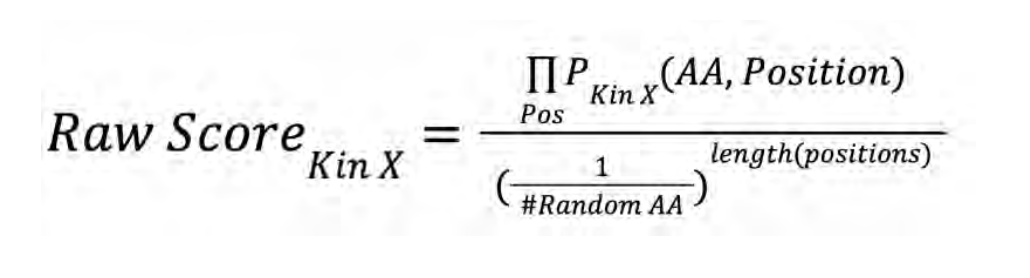

Given a string, calculate the product of the values divided by 1/17 (or 1/16 if PDHK) to the length of the calculated positions

An efficient way that utilize logarithmic property: log(a*b) = log(a) + log(b)

In [ ]:
#| export
def multiply(values, kinase):
    divide = 16 if 'PDHK' in kinase else 17

    # Using the logarithmic property: log(a*b) = log(a) + log(b)
    # Compute the sum of the logarithms of the values and the divide factor
    log_sum = np.sum(np.log2(values)) + (len(values) - 1) * np.log2(divide)

    return log_sum

In [ ]:
#| hide
# def multiply1(values,kinase):
#     divide = 16 if 'PDHK' in kinase else 17
#     score = np.prod(values)*divide**(len(values)-1)
#     return np.log2(score)

#| hide
# def multiply_score_func1(r,columns):
#     "Functions of calculating the kinase score given substrate string, according to the paper"
    
#     divide = 16 if 'PDHK' in r.name else 17
#     score_raw = r.product() * divide ** (len(columns)-1)
#     score_log = np.log2(score_raw)
#     return round(score_log,2) # can also return raw score

#| hide
# def multiply_score_func(r,columns):
#     "Functions of calculating the kinase score given substrate string, according to the paper"
    
#     divide = 16 if 'PDHK' in r.name else 17
    
#     log2_score = np.sum(np.log2(r)) + (len(r) - 1) * np.log2(divide)
#     return log2_score

### Function2 - average

Instead of calculating the product, get the sum of each positions divided by the length of calculated positions

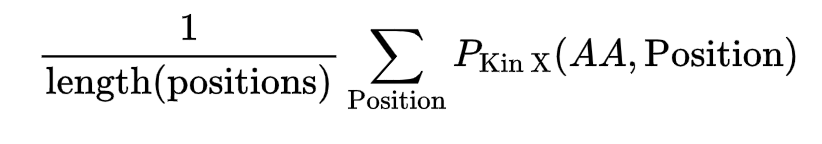

In [ ]:
#| export
def sumup(values,kinase=None):
    return sum(values)

In [ ]:
#| export
def predict_kinase(input_string, # site sequence
                          ref, # reference dataframe for scoring
                          func = sumup # function to calculate score
                         ):
    results=[]
    for kinase,row in tqdm(ref.iterrows(), total=ref.shape[0]):
        r_dict = row.to_dict() # To hash
        # result = []
        
        pos_aa_name=get_dict(input_string)
        pos_aa_name = [key for key in pos_aa_name if key in ref.columns]
        
        pos_aa_val = [r_dict[key] for key in pos_aa_name]

        score = func(pos_aa_val,kinase)
        results.append(score)
    
    print(f'calculated string: {pos_aa_name}')

    out = pd.Series(results,index=ref.index).sort_values(ascending=False)
        
    return out.round(3)

In [ ]:
#| export
def predict_kinase_df(df, # dataframe that contains site sequence
                   ref, # reference df for scoring
                   seq_col, # column name of site sequence
                   seq_id=None, # column name of site id
                   func = sumup # function to calculate score
                     ):
    results=[]
    num = list(set(ref.columns.str[:-1].astype(int)))
    num.sort()
    print(f'according to the ref \nwill calculate position: {num}')
    
    for kinase,row in tqdm(ref.iterrows(), total=ref.shape[0]):
        r_dict = row.to_dict() # To hash
        result = []
        for input_string in df[seq_col]:
            pos_aa_name=get_dict(input_string)
            pos_aa_val = [r_dict[key] for key in pos_aa_name]
            
            score = func(pos_aa_val,kinase)
            result.append(score)

        results.append(result)
        
        
    if seq_id is not None:
        out =pd.DataFrame(results,index=ref.index,columns=df[seq_id]).T
    else:
        out =pd.DataFrame(results,index=ref.index).T
        
    return out

In [ ]:
#| hide
# def average_score_func(r, columns):
#     "Functions of calculating the average score of each position"
    
#     average = r[columns].sum()/len(columns)
#     return average


#| hide
# def get_score(df, # Reference df where kinase is index, position+substrate is column
#                     input_string, # Format of string should be sth like this "PSVEPPLs*QET"
#                    func = multiply_score_func):
    
#     "Given reference (stacked df) and input substrate string, calculate possibilities that kinase can bind, according to the paper"
#     if '*' in input_string:
#         cols = get_dict_star(input_string)

#     else:
#         cols = get_dict(input_string)
    
#     cols = [col for col in df.columns if col in cols]
#     print(f'calculated columns: {cols}')

#     func2 = partial(func, columns=cols)
#     out = df[cols].apply(func2, axis=1,result_type='expand')
#     # out_df = pd.DataFrame(norm.apply(func, axis=1),columns=['raw_score','log2(score)'])
#     return out

### Examples

In [ ]:
ref_original = Data.get_pspa_original()

In [ ]:
ref_original.head() # Reference df

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,...,4E,4s,4t,4y,0s,0t,0y,0S,0T,0Y
kinase,,,,,,,,,,,,,,,,,,,,,
AAK1,0.0720,0.0245,0.0284,0.0456,0.0425,0.0425,0.0951,0.1554,0.0993,0.0864,...,0.0457,0.0251,0.0251,0.0270,0.1013,1.0000,0.0,0.1013,1.0000,0.0
ACVR2A,0.0415,0.0481,0.0584,0.0489,0.0578,0.0578,0.0598,0.0625,0.0596,0.0521,...,0.0640,0.0703,0.0703,0.0589,0.9833,1.0000,0.0,0.9833,1.0000,0.0
ACVR2B,0.0533,0.0517,0.0566,0.0772,0.0533,0.0533,0.0543,0.0442,0.0471,0.0516,...,0.0697,0.0761,0.0761,0.0637,0.9593,1.0000,0.0,0.9593,1.0000,0.0
AKT1,0.0603,0.0594,0.0552,0.0605,0.0516,0.0516,0.0427,0.0435,0.0464,0.0505,...,0.0312,0.0393,0.0393,0.0263,1.0000,0.6440,0.0,1.0000,0.6440,0.0
AKT2,0.0602,0.0617,0.0643,0.0582,0.0534,0.0534,0.0433,0.0418,0.0493,0.0513,...,0.0350,0.0548,0.0548,0.0417,1.0000,0.6077,0.0,1.0000,0.6077,0.0


***multiply score***

In [ ]:
predict_kinase("PSVEPPLsQETFSDL",ref_original, multiply)

100%|██████████| 303/303 [00:00<00:00, 8662.49it/s]

calculated string: ['-5V', '-4E', '-3P', '-2P', '-1L', '0s', '1Q', '2E', '3T', '4F']


kinase
ATM       5.037
SMG1      4.385
DNAPK     3.818
ATR       3.507
FAM20C    3.170
          ...  
PKN1     -7.275
P70S6K   -7.295
AKT3     -7.375
PKCI     -7.742
NEK3     -8.254
Length: 303, dtype: float64

***average score***

if using the same ref data

In [ ]:
predict_kinase("PSVEPPLsQETFSDL",ref_original)

100%|██████████| 303/303 [00:00<00:00, 9925.29it/s]

calculated string: ['-5V', '-4E', '-3P', '-2P', '-1L', '0s', '1Q', '2E', '3T', '4F']


kinase
FAM20C    2.237
SMG1      2.091
ATM       2.084
DNAPK     1.980
ATR       1.868
          ...  
BIKE      0.624
ASK1      0.579
MYO3B     0.564
STLK3     0.557
MYO3A     0.544
Length: 303, dtype: float64

***If using our scaled data of pspa that's for all capital***

In [ ]:
ref = Data.get_combine_upper()

multiply

In [ ]:
predict_kinase("PSVEPPLSQETFSDL",ref,multiply) 
# can have error for ks ref as there are 0 values

  0%|          | 0/390 [00:00<?, ?it/s]/tmp/ipykernel_134831/3326701046.py:7: RuntimeWarning: divide by zero encountered in log2
  log_sum = np.sum(np.log2(values)) + (len(values) - 1) * np.log2(divide)
100%|██████████| 390/390 [00:00<00:00, 7827.03it/s]

calculated string: ['-5V', '-4E', '-3P', '-2P', '-1L', '0S', '1Q', '2E', '3T', '4F']


kinase
SMG1       1.460
ATM        1.126
DNAPK      0.830
FAM20C     0.115
GSK3A      0.074
           ...  
P70S6K   -10.327
PKCI     -10.726
NEK3     -11.141
MAP2K3      -inf
MAP2K4      -inf
Length: 390, dtype: float64

In [ ]:
predict_kinase("PSVEPPLSQETFSDL",ref)

100%|██████████| 390/390 [00:00<00:00, 10793.51it/s]

calculated string: ['-5V', '-4E', '-3P', '-2P', '-1L', '0S', '1Q', '2E', '3T', '4F']


kinase
FAM20C    1.922
SMG1      1.570
CK2A1     1.541
ATM       1.540
CK2A2     1.439
          ...  
MYO3B     0.484
ASK1      0.481
WEE1      0.475
STLK3     0.465
MYO3A     0.462
Length: 390, dtype: float64

## Predict phosphoproteomics

In [ ]:
#| hide
# def predict_kinase(df, ref, seq_col, seq_id=None):
#     results=[]
#     for i,r in tqdm(ref.iterrows(), total=ref.shape[0]):
#         r_dict = r.to_dict() # To hash
#         result = []
#         for input_string in df[seq_col]:
#             cols=get_dict(input_string)
#             score = sum(r_dict[key] for key in cols)
#             result.append(score)

#         results.append(result)
#     if seq_id is not None:
#         out =pd.DataFrame(results,index=ref.index,columns=df[seq_id]).T
#     else:
#         out =pd.DataFrame(results,index=ref.index).T
        
#     return out

In [ ]:
d = Data.get_ochoa_site().head()

ref = Data.get_ks_upper()

predict_kinase_df(d,ref,'site_seq')

according to the ref 
will calculate position: [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]


100%|██████████| 289/289 [00:00<00:00, 7213.18it/s]


kinase,SRC,EPHA3,FES,NTRK3,ALK,EPHA8,ABL1,FLT3,EPHB2,FYN,...,MEK5,PKN2,MAP2K7,MRCKB,HIPK3,CDK8,BUB1,MEKK3,MAP2K3,GRK1
0,0.975307,1.088103,1.024297,1.055557,0.991858,1.095960,0.963895,0.974716,1.031825,1.053151,...,1.209006,1.845246,1.553544,1.691919,1.358586,1.793270,1.332794,1.384679,1.456727,1.974188
1,0.895416,0.953961,0.948499,0.961790,0.868367,0.928279,0.852676,0.823955,0.921067,0.911028,...,1.037030,1.427855,1.335121,1.153418,1.641751,1.689144,1.220036,1.197893,1.119174,1.811465
2,0.849546,0.898449,0.844726,0.879204,0.874974,0.903264,0.845611,0.843124,0.855262,0.874833,...,1.414065,2.134812,1.445507,1.003682,1.340236,1.435649,1.315813,1.267839,1.231376,1.886599
3,0.806390,0.841915,0.810970,0.914746,0.874387,0.753362,0.838206,0.803782,0.826301,0.790217,...,1.091456,1.846551,1.634287,1.490388,1.561279,1.464307,1.457233,1.084019,1.498325,1.745420
4,0.828211,0.791854,0.783151,0.859955,0.827160,0.743060,0.795135,0.786305,0.799112,0.854680,...,1.056100,1.279951,1.452646,1.170946,1.503872,1.388840,1.334052,1.063377,1.062349,1.823619


## Aggregate amino acid at each position

Need to split site sequence to columns first

### Weights

In [ ]:
#| export
def agg_seq(df, # contains split columns
            agg_col = None, # column of weight, if None, will count number
           ):
    melt = df.melt(id_vars=agg_col,value_vars=[i for i in range(-7,8)])
    if agg_col is not None:
        # aggregate by the values
        agg = melt.groupby(['variable','value']).agg({agg_col:sum}).reset_index()
    else:
        # aggregate by the count
        agg = melt.groupby(['variable','value']).size().reset_index()
    pivot = agg.pivot(index='value',columns='variable',values=agg.columns[-1])
    # aa_order = [i for i in 'PGACSTVILMFYWHKRQNDEsty']
    aa_order = [i for i in 'PGACSTVILMFYWHKRQNDE']
    pivot = pivot.reindex(index=aa_order).fillna(0)
    return pivot

### Frequency

In [ ]:
#| export
def get_freq(df_k,
             aa_order = [i for i in 'PGACSTVILMFYWHKRQNDEsty'],
            aa_order_paper = [i for i in 'PGACSTVILMFYWHKRQNDEsty'],
             position = [i for i in range(-7,8)],
             position_paper = [-5,-4,-3,-2,-1,1,2,3,4]
            ):
    
    "Get frequency of each amino acid at each position"
    

    #Count frequency for each amino acid at each position
    melted_k = df_k.melt(id_vars=['Kinase', 'substrate'], 
                    value_vars=[i for i in range(-7, 8)],
                    var_name='Position', 
                    value_name='aa')
    
    # Group by Position and Amino Acid and count occurrences
    grouped = melted_k.groupby(['Position', 'aa']).size().reset_index(name='Count')
    

    # Remove wired amino acid
    aa_include = [i for i in 'PGACSTVILMFYWHKRQNDEsty']
    grouped = grouped[grouped.aa.isin(aa_include)].reset_index(drop=True)
    
    # get pivot table
    pivot_k = grouped.pivot(index='aa', columns='Position', values='Count').fillna(0)
    
    # Get frequency by dividing the sum of each column
    freq_k = pivot_k/pivot_k.sum()

    
    # data from the kinase-substrate dataset, and format is Lew's paper's format
    paper = freq_k.reindex(index=aa_order_paper,columns=position_paper,fill_value=0)

    # full pivot data from kinase-substrate dataset
    full = freq_k.reindex(index=aa_order,columns=position, fill_value=0)

    
    return paper,full

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()